In [1]:
import os
import json
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
%cd ..
from src.utils import load_config
from src.data_loader import OccupancyData
%cd -

/workspaces/hospitalization-model
/workspaces/hospitalization-model/notebooks


In [2]:
dates = load_config("../config/24_dates.yaml")["dates"]
print(dates)

['2020-12-08', '2021-01-05', '2021-02-02', '2021-03-02', '2021-03-30', '2021-04-27', '2021-05-25', '2021-06-23', '2021-07-21', '2021-08-18', '2021-09-15', '2021-10-13', '2021-11-10', '2021-12-08', '2022-01-05', '2022-02-03', '2022-03-03', '2022-03-31', '2022-04-28', '2022-05-26', '2022-06-23', '2022-07-21', '2022-08-18', '2022-09-16']


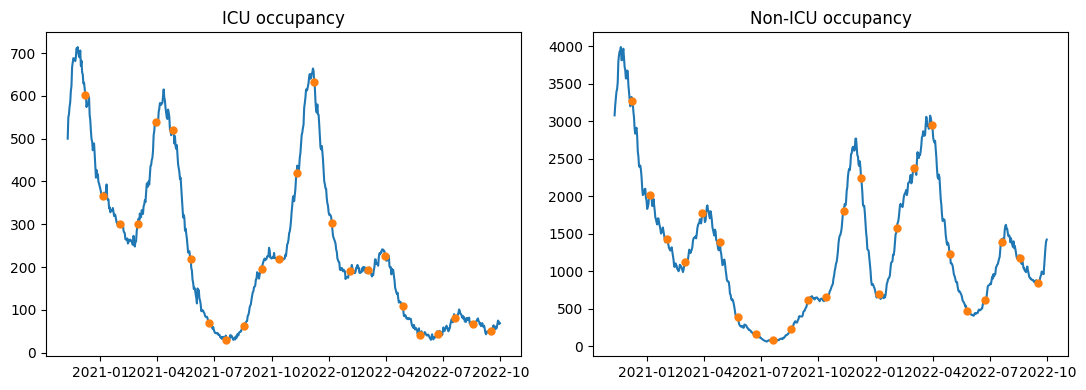

In [3]:
data = OccupancyData("../data/hospitalization.csv")
icu = data.get_df("2020-11-10", "2022-10-01", "Österreich", "ICU")
normal = data.get_df("2020-11-10", "2022-10-01", "Österreich", "normal")
fig, ax = plt.subplots(1, 2, figsize=(11, 4))
ax[0].plot(icu)
ax[0].plot(icu.loc[dates],linestyle="",marker="o", markersize=5)
ax[0].set_title("ICU occupancy")
ax[1].plot(normal)
ax[1].plot(normal.loc[dates],linestyle="",marker="o", markersize=5)
ax[1].set_title("Non-ICU occupancy")
plt.tight_layout()
plt.savefig("plots/24dates.pdf")

interval,mean_mase,mean_mape,std_mase,std_mape,mean_calibration_mape
7,3.504236,13.581280,3.153912,10.498583,2.128433
14,3.813773,14.638348,3.285414,11.129703,3.325302
21,5.710411,18.969642,9.624056,24.223855,4.092146
28,7.877509,25.649568,12.086507,29.337454,4.646206
35,9.256486,29.987352,13.817893,33.129465,5.719202
42,9.781833,31.315156,14.229476,33.419280,6.562721
49,11.297007,35.853156,17.994700,42.907354,7.241986
56,11.412634,36.524942,18.210043,43.664305,8.484697


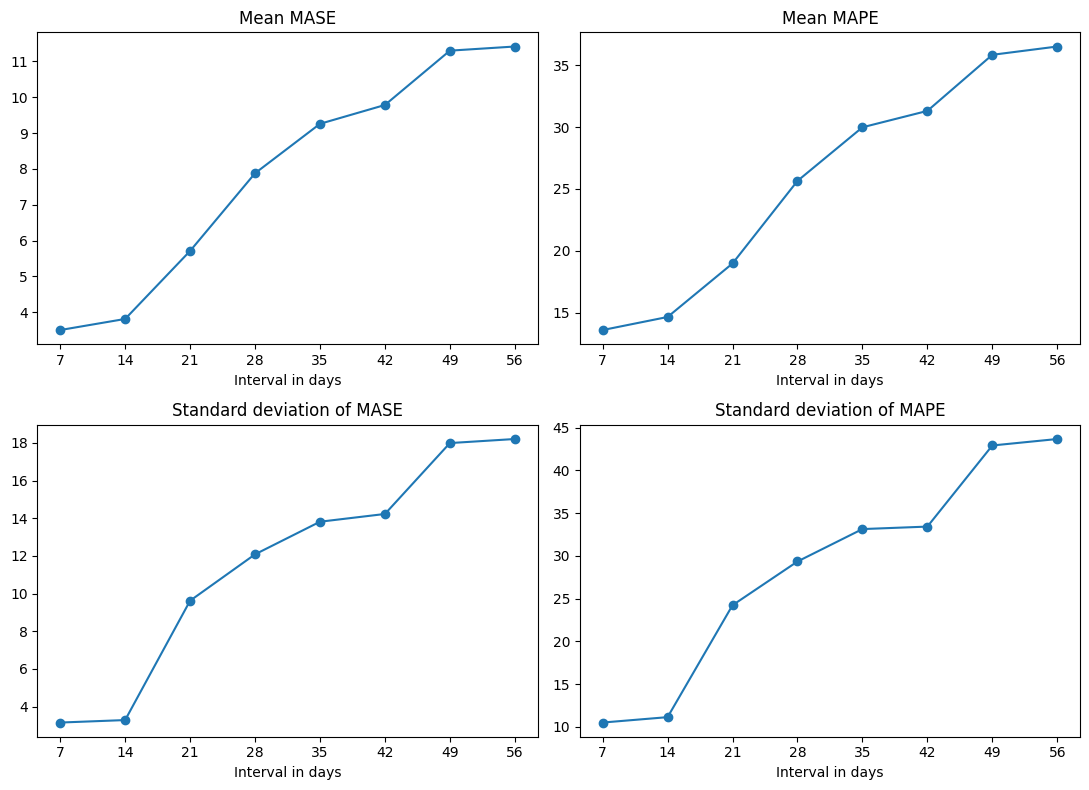

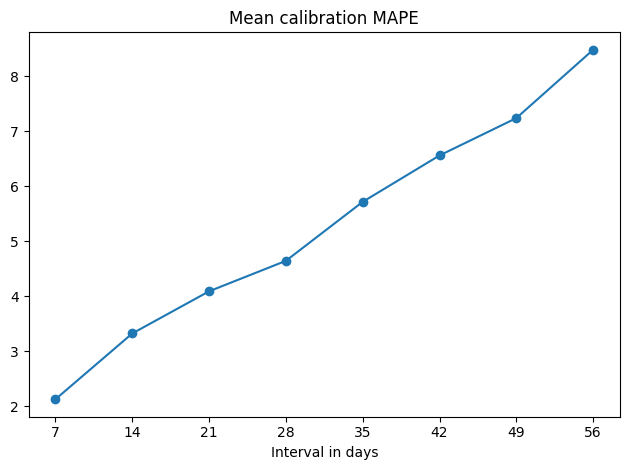

In [4]:
intervals = [7, 14, 21, 28, 35, 42, 49, 56]
data = []
for i in intervals:
    with open(os.path.join("../benchmarks", f"causal_model_{i}day_interval.json")) as f:
        benchmark = json.load(f)
        mase = []
        mape = []
        calibration = []
        for date in benchmark["successful_forecasts"]:
            mase.append(benchmark["successful_forecasts"][date]["mase"])
            mape.append(benchmark["successful_forecasts"][date]["mape"])
            calibration.append(benchmark["successful_forecasts"][date]["calibration_stats"]["mape"])
        data.append((i, np.mean(mase), np.mean(mape), np.std(mase), np.std(mape), np.mean(calibration)))
df = pd.DataFrame(data, columns=["interval", "mean_mase", "mean_mape", "std_mase", "std_mape", "mean_calibration_mape"])
fig, ax = plt.subplots(2, 2, figsize=(11, 8))
df.plot(x="interval", y="mean_mase", marker="o", ax=ax[0,0])
ax[0,0].set_title("Mean MASE")
ax[0,0].set_xticks(df["interval"])
ax[0,0].set_xlabel("Interval in days")
ax[0,0].legend().remove()
df.plot(x="interval", y="std_mase", marker="o", ax=ax[1,0])
ax[1,0].set_title("Standard deviation of MASE")
ax[1,0].set_xticks(df["interval"])
ax[1,0].set_xlabel("Interval in days")
ax[1,0].legend().remove()
df.plot(x="interval", y="mean_mape", marker="o", ax=ax[0,1])
ax[0,1].set_title("Mean MAPE")
ax[0,1].set_xticks(df["interval"])
ax[0,1].set_xlabel("Interval in days")
ax[0,1].legend().remove()
df.plot(x="interval", y="std_mape", marker="o", ax=ax[1,1])
ax[1,1].set_title("Standard deviation of MAPE")
ax[1,1].set_xticks(df["interval"])
ax[1,1].set_xlabel("Interval in days")
ax[1,1].legend().remove()
plt.tight_layout()
plt.savefig("plots/causal_model_interval_1.pdf")
df.plot(x="interval", y="mean_calibration_mape", marker="o")
plt.title("Mean calibration MAPE")
plt.xticks(df["interval"])
plt.xlabel("Interval in days")
plt.legend().remove()
plt.tight_layout()
plt.savefig("plots/causal_model_interval_calibration_1.pdf")
df.style.hide(axis='index')

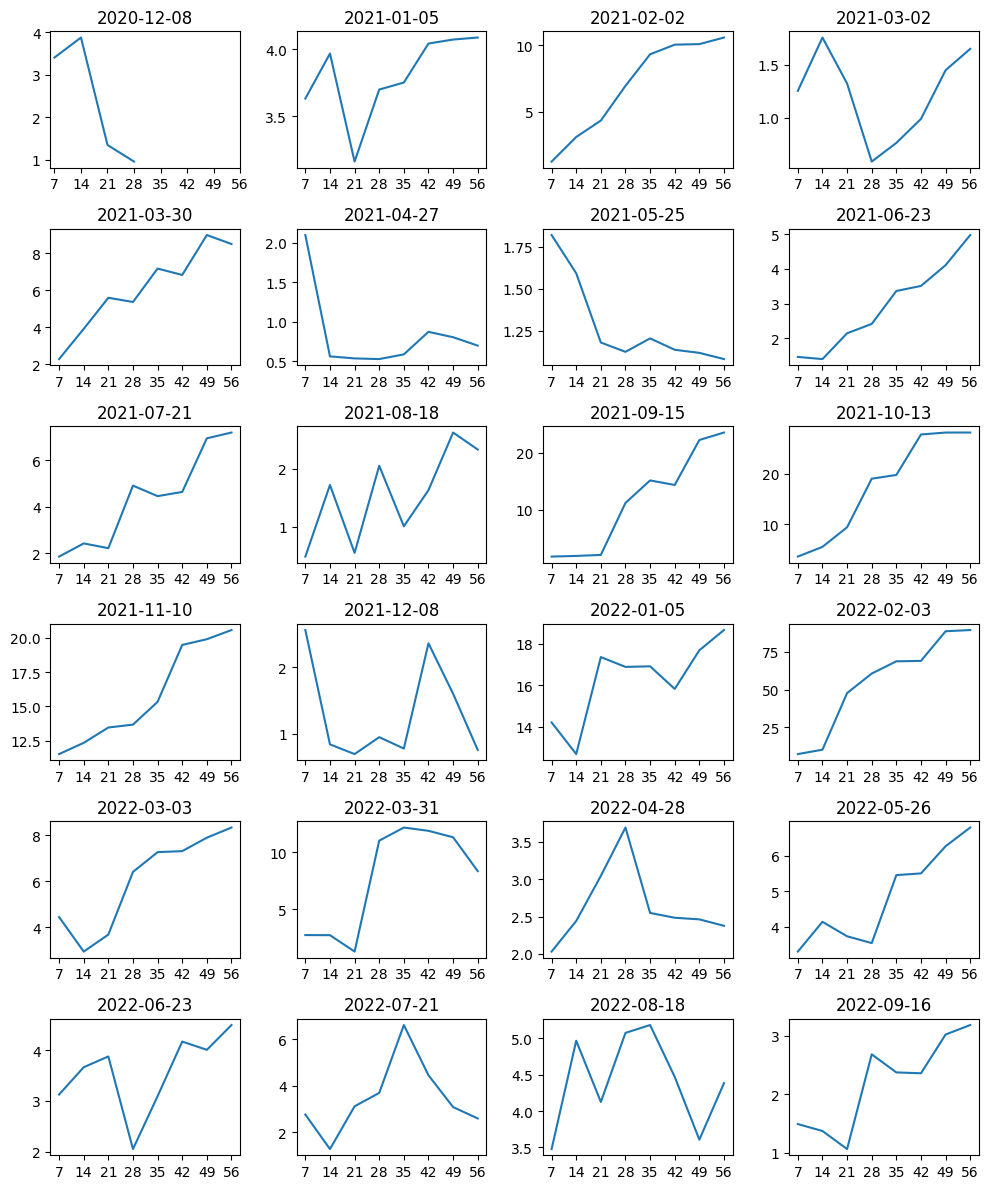

In [5]:
intervals = [7, 14, 21, 28, 35, 42, 49, 56]
fig, axs = plt.subplots(6, 4)
fig.set_size_inches(10, 12)
axs = axs.flatten()
for (i,date) in enumerate(dates):
    errors= []
    for interval in intervals:
        with open(os.path.join("../benchmarks", f"causal_model_{interval}day_interval.json")) as f:
            try:
                errors.append(json.load(f)["successful_forecasts"][date]["mase"])
            except KeyError:
                errors.append(np.nan)
    axs[i].plot(intervals, errors)
    axs[i].set_title(date)
    axs[i].set_xticks(intervals)
plt.tight_layout()
plt.savefig("plots/causal_model_interval_dates.pdf")

interval,mean_mase,mean_mape,std_mase,std_mape,mean_calibration_mape
3,3.651953,15.038056,2.654208,10.726763,1.462746
4,3.985951,16.149921,4.121159,14.414733,1.522998
5,3.493775,14.072875,2.918518,10.098462,1.784223
6,3.333530,13.375115,2.681120,10.049814,1.917913
7,3.504236,13.581280,3.153912,10.498583,2.128433
8,3.585203,14.177686,3.425326,11.962872,2.358760
9,3.565755,14.204601,3.263180,11.662252,2.547729
10,3.585102,13.849740,3.424440,11.930181,2.892161
11,3.639011,14.243394,3.444444,11.996330,2.912200


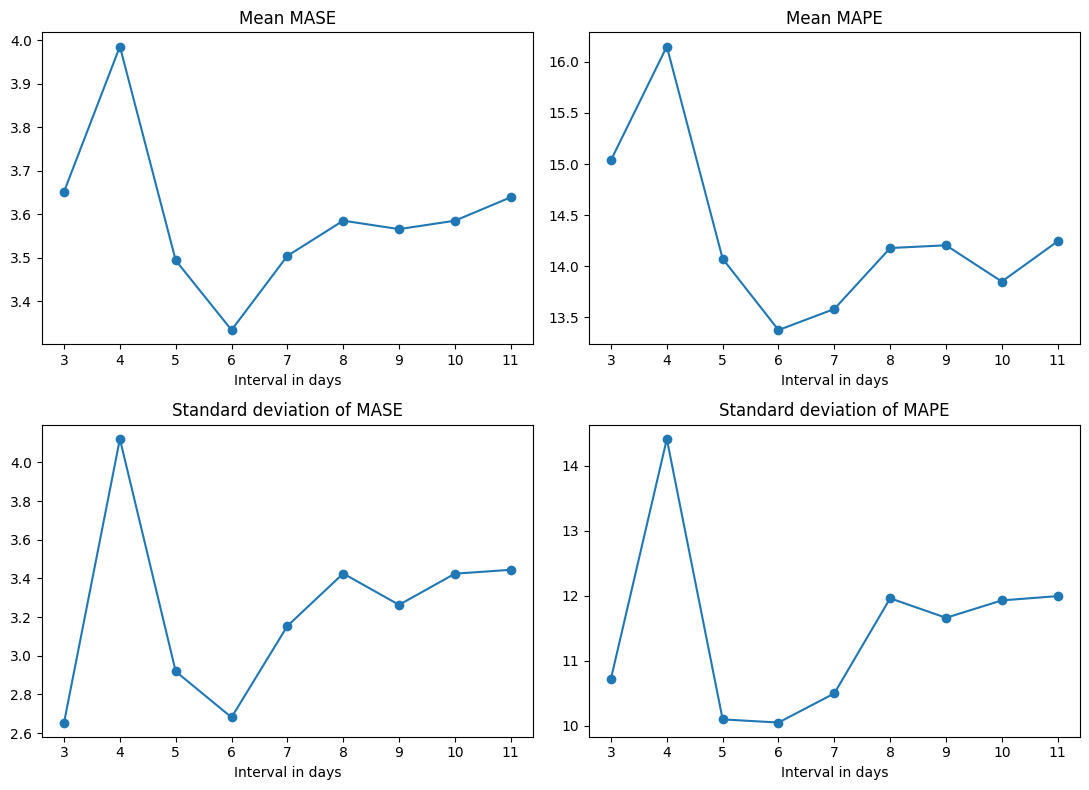

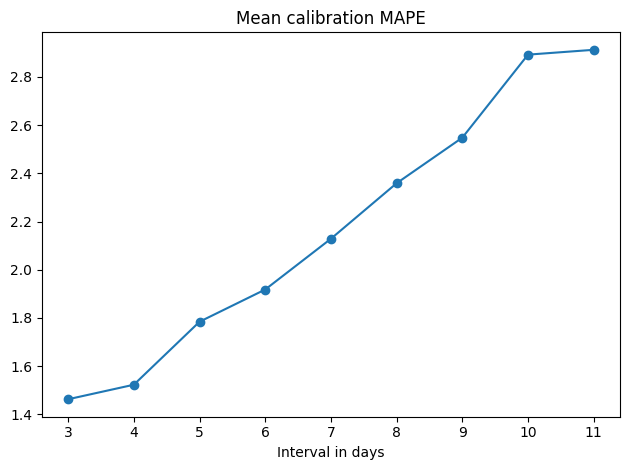

In [6]:
intervals = range(3, 12)
data = []
for i in intervals:
    with open(os.path.join("../benchmarks", f"causal_model_{i}day_interval.json")) as f:
        benchmark = json.load(f)
        mase = []
        mape = []
        calibration = []
        for date in benchmark["successful_forecasts"]:
            mase.append(benchmark["successful_forecasts"][date]["mase"])
            mape.append(benchmark["successful_forecasts"][date]["mape"])
            calibration.append(benchmark["successful_forecasts"][date]["calibration_stats"]["mape"])
        data.append((i, np.mean(mase), np.mean(mape), np.std(mase), np.std(mape), np.mean(calibration)))
df = pd.DataFrame(data, columns=["interval", "mean_mase", "mean_mape", "std_mase", "std_mape", "mean_calibration_mape"])
fig, ax = plt.subplots(2, 2, figsize=(11, 8))
df.plot(x="interval", y="mean_mase", marker="o", ax=ax[0,0])
ax[0,0].set_title("Mean MASE")
ax[0,0].set_xticks(df["interval"])
ax[0,0].set_xlabel("Interval in days")
ax[0,0].legend().remove()
df.plot(x="interval", y="std_mase", marker="o", ax=ax[1,0])
ax[1,0].set_title("Standard deviation of MASE")
ax[1,0].set_xticks(df["interval"])
ax[1,0].set_xlabel("Interval in days")
ax[1,0].legend().remove()
df.plot(x="interval", y="mean_mape", marker="o", ax=ax[0,1])
ax[0,1].set_title("Mean MAPE")
ax[0,1].set_xticks(df["interval"])
ax[0,1].set_xlabel("Interval in days")
ax[0,1].legend().remove()
df.plot(x="interval", y="std_mape", marker="o", ax=ax[1,1])
ax[1,1].set_title("Standard deviation of MAPE")
ax[1,1].set_xticks(df["interval"])
ax[1,1].set_xlabel("Interval in days")
ax[1,1].legend().remove()
plt.tight_layout()
plt.savefig("plots/causal_model_interval_2.pdf")
df.plot(x="interval", y="mean_calibration_mape", marker="o")
plt.title("Mean calibration MAPE")
plt.xticks(df["interval"])
plt.xlabel("Interval in days")
plt.legend().remove()
plt.tight_layout()
plt.savefig("plots/causal_model_calibration_2.pdf")
df.style.hide(axis='index')

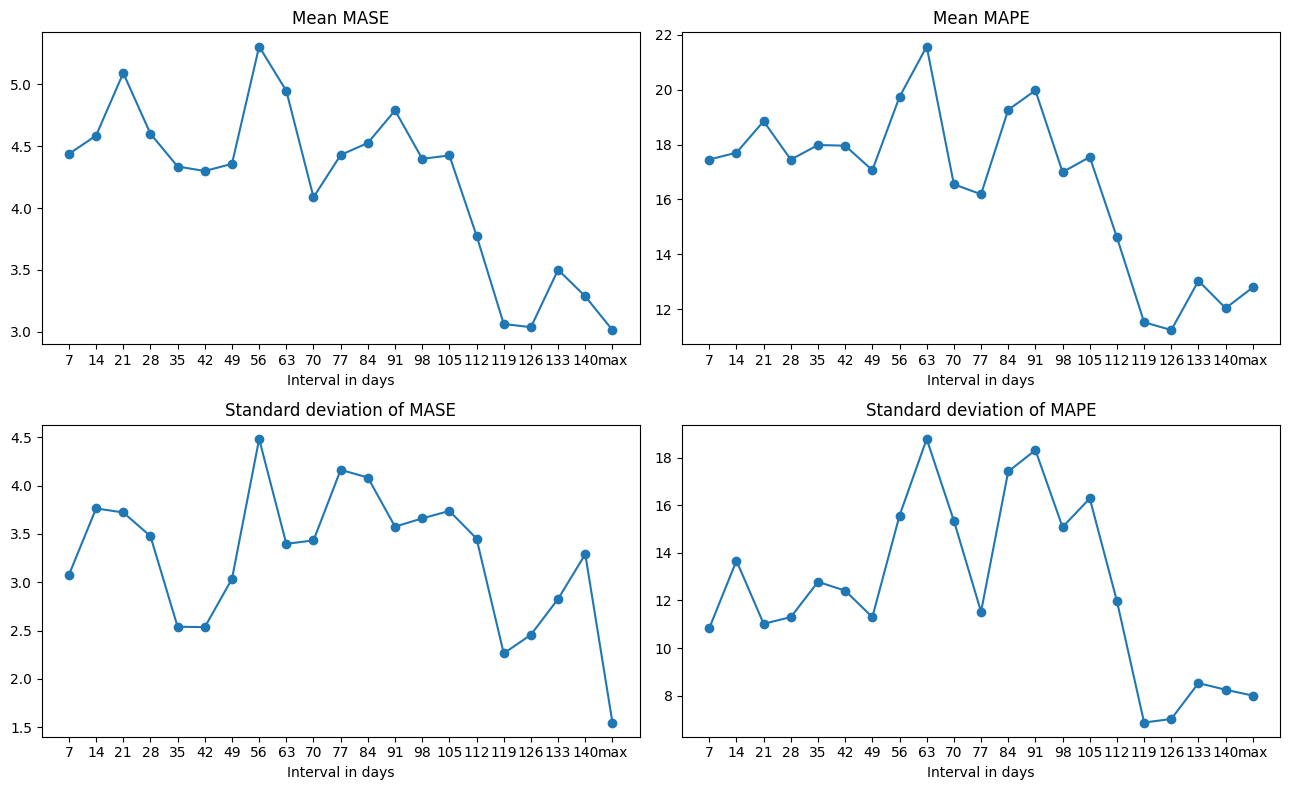

interval,mean_mase,mean_mape,std_mase,std_mape
7,4.437975,17.457967,3.075183,10.832493
14,4.586590,17.707964,3.763605,13.674937
21,5.092651,18.855563,3.722407,11.020240
28,4.601896,17.453824,3.477197,11.300565
35,4.336234,17.986894,2.539206,12.784802
42,4.300025,17.962562,2.535113,12.414851
49,4.357621,17.069763,3.034267,11.299231
56,5.307134,19.741674,4.482483,15.572121
63,4.948208,21.580033,3.397474,18.796575
70,4.087460,16.554287,3.432612,15.356607


In [7]:
intervals = [7, 14, 21, 28, 35, 42, 49, 56, 63, 70, 77, 84, 91, 98, 105, 112, 119, 126, 133, 140, 10000]
data = []
for i in intervals:
    with open(os.path.join("../benchmarks", f"arima_model_{i}day_interval.json")) as f:
        benchmark = json.load(f)
        mase = []
        mape = []
        calibration = []
        for date in benchmark["successful_forecasts"]:
            mase.append(benchmark["successful_forecasts"][date]["mase"])
            mape.append(benchmark["successful_forecasts"][date]["mape"])
        if i == 10000:
            i = "max"
        data.append((i, np.mean(mase), np.mean(mape), np.std(mase), np.std(mape)))
df = pd.DataFrame(data, columns=["interval", "mean_mase", "mean_mape", "std_mase", "std_mape"])
fig, ax = plt.subplots(2, 2, figsize=(13, 8))
x = range(0,len(intervals))
labels = [str(i) for i in df["interval"]]
ax[0,0].plot(x, df["mean_mase"], marker="o")
ax[0,0].set_title("Mean MASE")
ax[0,0].set_xticks(x, labels)
ax[0,0].set_xlabel("Interval in days")
ax[1,0].plot(x, df["std_mase"], marker="o")
ax[1,0].set_title("Standard deviation of MASE")
ax[1,0].set_xticks(x, labels)
ax[1,0].set_xlabel("Interval in days")
ax[0,1].plot(x, df["mean_mape"], marker="o")
ax[0,1].set_title("Mean MAPE")
ax[0,1].set_xticks(x, labels)
ax[0,1].set_xlabel("Interval in days")
ax[1,1].plot(x, df["std_mape"], marker="o")
ax[1,1].set_title("Standard deviation of MAPE")
ax[1,1].set_xticks(x, labels)
ax[1,1].set_xlabel("Interval in days")
plt.tight_layout()
plt.savefig("plots/arima_model_interval.pdf")
plt.show()
df.style.hide(axis='index')